In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

#Minhas Bibliotecas
import DatasetAnalise as faa
import CreateVariables as facv
import SolveNullsAndPreparationData as fanp

from skmultilearn.model_selection import IterativeStratification
from skmultilearn.model_selection import iterative_train_test_split

2020-07-01 14:00:32,671 [INFO]  NumExpr defaulting to 4 threads.


# Carrega as bases necessárias

In [20]:
#*****************
#OBS: Não tirei Cabins!! (Tenta usar depois no modelo com ensemble)
#*****************

#Dados de entradas de treino
df = pd.read_csv('bases/train.csv')

#Coloca a coluna de resposta no começo
df = faa.colocaAlvoComeco(df, 'Survived')

#Dados de entrada de teste
df_test = pd.read_csv('bases/test.csv')

#Dados das soluções dos dados de teste (modelo de submissão)
df_gender = pd.read_csv('submissoes/gender_submission.csv')

df

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
import random
for i in range(0, 5):
    nome_alvo = 'Survived'
    X_temp = df.drop(nome_alvo, axis = 1)
    y_temp = df[[nome_alvo]]
    _, _, X_test, y_test = iterative_train_test_split(X_temp.values, y_temp.values, test_size = 1.0)
    df_aux = pd.DataFrame(X_test, columns = list(X_temp.columns))
    df_aux[nome_alvo] = y_test

    indices = df_aux.sample(frac = 1, replace = False).index
    df_aux.loc[:,'Pclass'] = df_aux.loc[indices,'Pclass'].values
    indices = df_aux.sample(frac = 1, replace = False).index
    df_aux.loc[:,'Age'] = df_aux.loc[indices,'Age'].values
    indices = df_aux.sample(frac = 1, replace = False).index
    df_aux.loc[:,'SibSp'] = df_aux.loc[indices,'SibSp'].values
    indices = df_aux.sample(frac = 1, replace = False).index
    df_aux.loc[:,'Parch'] = df_aux.loc[indices,'Parch'].values
    indices = df_aux.sample(frac = 1, replace = False).index
    df_aux.loc[:,'Ticket'] = df_aux.loc[indices,'Ticket'].values
    indices = df_aux.sample(frac = 1, replace = False).index
    df_aux.loc[:,'Fare'] = df_aux.loc[indices,'Fare'].values
    indices = df_aux.sample(frac = 1, replace = False).index
    df_aux.loc[:,'Cabin'] = df_aux.loc[indices,'Cabin'].values
    indices = df_aux.sample(frac = 1, replace = False).index
    df_aux.loc[:,'Embarked'] = df_aux.loc[indices,'Embarked'].values
    df_aux['Survived'] = 0
    df = pd.concat([df, df_aux]).reset_index(drop = True)
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26,NaN,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35,NaN,S,8.05,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
28507,20,NaN,S,30,"Montvila, Rev. Juozas",0,887,2,male,0,0,29750
28508,35,NaN,S,7.75,"Graham, Miss. Margaret Edith",0,888,3,female,0,0,113505
28509,40,NaN,S,82.1708,"Johnston, Miss. Catherine Helen ""Carrie""",0,889,1,female,0,0,PC 17593
28510,1,D47,S,8.05,"Behr, Mr. Karl Howell",0,890,3,male,0,0,230080


# Dataset v1

In [22]:
#Muda como se descrimina o sexo
df2 = facv.simplificaStringSexo(df)
df_test2 = facv.simplificaStringSexo(df_test)

In [23]:
#Quebra o Nome e o Ticket em partes específicas que podem conter um padrão

df2 = facv.quebraNome(df2)
df_test2 = facv.quebraNome(df_test2)

df2 = facv.quebraTicket(df2)
df_test2 = facv.quebraTicket(df_test2)

df2 = facv.quebraCabins(df2)
df_test2 = facv.quebraCabins(df_test2)

In [24]:
#Olha os Prefixos de Ticket e muda na mão alguns que devem ser o mesmo mas está escrito diferente

origem = ['SC/Paris', 'A/5', 'A/4', 'SC/AHBasle', 'WE/P', 'SOTON/O2', 'STON/OQ', 'SO/C', 'SOP', 'SCO/W', 'AQ/4', 'CA/SOTON',
         'P/PP', 'SW/PP', 'PP', 'A/S', 'Fa', 'FC', 'SC/A3', 'SC/A4']
mudar = ['SC/PARIS', 'A5', 'A4', 'SC/AH', 'WEP', 'STON/O2', 'SOTON/OQ', 'SOC', 'SO/PP', 'SOC', 'A4', 'CA',
        'SO/PP', 'SO/PP', 'SO/PP', 'A5', 'FCC', 'FCC', 'SC/AH', 'SC/AH']
for i in range(0, len(mudar)):
    df2['Ticket_pref'] = [mudar[i] if v == origem[i] else v for v in df2['Ticket_pref']]
    df_test2['Ticket_pref'] = [mudar[i] if v == origem[i] else v for v in df_test2['Ticket_pref']]

df_aux = pd.concat([df2, df_test2], ignore_index = False, sort = False).reset_index(drop = True)
df_aux['Ticket_pref'].value_counts()

SEM_PREF    21448
PC           1952
CA           1371
A5            711
STON/O2       644
SOTON/OQ      490
SC/PARIS      360
SO/PP         357
W/C           325
FCC           230
A4            228
SOC           226
C             163
SC/AH         132
LINE          128
WEP            97
SC             33
SP             32
AQ/3            1
LP              1
A2              1
Name: Ticket_pref, dtype: int64

In [25]:
#Cria variáveis relacionadas com parentes ou pessoas com mesmo Ticket

df2, df_test2 = facv.createCountingEqualValues(df2, df_test2, ['Ticket_pref', 'Ticket_num'], col_name = 'Equal_Ticket')

df2['Size_Family'] = df2['SibSp'] + df2['Parch']
df_test2['Size_Family'] = df_test2['SibSp'] + df_test2['Parch']

df2['Alone'] = np.where((df2['Size_Family'] == 0) & (df2['Equal_Ticket'] == 1), 'Yes', 'No')
df_test2['Alone'] = np.where((df_test2['Size_Family'] == 0) & (df_test2['Equal_Ticket'] == 1), 'Yes', 'No')

In [26]:
#A distância até o Deck D parece ter algo especial (ponto do impacto? - Vídeo Youtube)
#https://www.youtube.com/watch?v=J6QRktVkRa0&list=WL

#Vale a pena marcar Decks mais próximos dos botes?
#https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic#/media/File:Titanic_Boat_Deck_plan_with_lifeboats.png

df2['Cabin_dist'] = [np.abs(ord(v) - ord('D')) if type(v) == str else np.nan for v in df2['Cabin_pref']]
df_test2['Cabin_dist'] = [np.abs(ord(v) - ord('D')) if type(v) == str else np.nan for v in df_test2['Cabin_pref']]

In [27]:
#Trata o nulo do Embarked de forma simples e do Fare também (pq tem pouco)
df2, df_test2 = fanp.completeWithMostFrequent(df2, df_test2, 'Embarked')
df2, df_test2 = fanp.completeWithMean(df2, df_test2, 'Fare', force_int = False)
#df2.info()

----------------------
Fare
Acurácia Esperada (R^2): -0.0 ± 0.0
Erro Esperado: 49.76452742619151


----------------------
Age
Acurácia Esperada (R^2): -0.0 ± 0.1
Erro Esperado: 14.514388103498607
*******************Age*******************
            count      mean        std   min   25%   50%   75%   max
Age       22848.0  29.69911  14.516706  0.42  20.0  28.0  38.0  80.0
Age_test    332.0  30.27259  14.181209  0.17  21.0  27.0  39.0  76.0


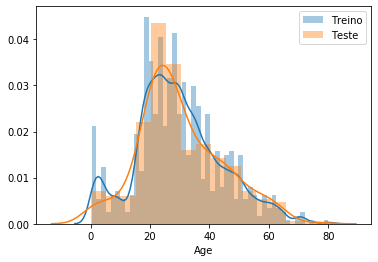

------Nulos------
Treino: 5664 / 0.1987
Teste: 86 / 0.2057
 
------Quantidade de valores distintos------
Treino: 88 / 0.0039
Teste: 79 / 0.238
 


In [28]:
#Trata os Nulos de Age usando um modelo com os dados não nulos (método mais avançado)
#OBS: Notar que primeiro tratamos o Fare que tem menos nulos, para depois tratar Age que tem mais nulos

colunas_dropar = ['PassengerId', 'Name_Parentesis', 'Nickname', 'First_Name', 'Last_Name',
                  'Cabin_quant', 'Cabin_pref', 'Cabin_num', 'Cabin_dist']
colunas_dummerizar = ['Sex', 'Embarked', 'Alone', 'Ticket_pref', 'Honorific']

#df_temp, df_test_temp = fanp.completeWithModel(df2, df_test2, colunas_dropar, colunas_dummerizar, 'Survived', 'Age', 'xg')
df_temp, df_test_temp = fanp.completeWithMean(df2, df_test2, 'Age', force_int = True)

#Vê como ficou a distribuição da idade
faa.analiseVariableContinuousOrDiscreteSorted(df2, df_test2, 'Age', True)

In [29]:
#Se o modelo ficou bom pra idade, usar ele no dataset
df2 = df_temp
df_test2 = df_test_temp

In [30]:
#Cria mais variaveis relacionadas as pessoas com o mesmo ticket
#OBS: Note que só criamos depois de preencher a idade pq essa variavel nova precisa da idade para ser criada

df2, df_test2 = facv.createMaxMinAge(df2, df_test2)

In [31]:
#Remove as colunas que não serão usadas
colunas_dropar = ['PassengerId', 'Name_Parentesis', 'Nickname', 'First_Name', 'Last_Name']
df2, df_test2 = fanp.dropColumns(df2, df_test2, colunas_dropar)

In [32]:
#Dummeriza as variaveis (Tem que juntar os dois dfs pra dummerizar mesmo pra ficar coerente)
colunas_dummerizar = ['Sex', 'Embarked', 'Alone', 'Ticket_pref', 'Honorific', 'Cabin_pref']
df2, df_test2 = fanp.dummerizaVariaveis(df2, df_test2, 'Survived', colunas_dummerizar)

In [33]:
#Coloca a variavel de interesse no final de novo
df2 = faa.colocaAlvoComeco(df2, 'Survived')

In [34]:
#Salva esses dados tratados
df2.to_csv('bases/train_v1t.csv', index = False)
df_test2.to_csv('bases/test_v1t.csv', index = False)
df2

,Survived,Age,Fare,Parch,Pclass,SibSp,Ticket_num,Cabin_quant,Cabin_num,Equal_Ticket,...,Honorific_Sir,Honorific_the Countess,Cabin_pref_A,Cabin_pref_B,Cabin_pref_C,Cabin_pref_D,Cabin_pref_E,Cabin_pref_F,Cabin_pref_G,Cabin_pref_T
0,0,22.0,7.2500,0,3,1,21171.0,NaN,NaN,32,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,0,1,1,17599.0,1.0,85.0,33,...,0,0,0,0,1,0,0,0,0,0
2,1,26.0,7.9250,0,3,0,3101282.0,NaN,NaN,32,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,53.1000,0,1,1,113803.0,1.0,123.0,64,...,0,0,0,0,1,0,0,0,0,0
4,0,35.0,8.0500,0,3,0,373450.0,NaN,NaN,32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,0,20.0,30.0000,0,2,0,29750.0,NaN,NaN,65,...,0,0,0,0,0,0,0,0,0,0
28508,0,35.0,7.7500,0,3,0,113505.0,NaN,NaN,64,...,0,0,0,0,0,0,0,0,0,0
28509,0,40.0,82.1708,0,1,0,17593.0,NaN,NaN,64,...,0,0,0,0,0,0,0,0,0,0
28510,0,1.0,8.0500,0,3,0,230080.0,1.0,47.0,96,...,0,0,0,0,0,1,0,0,0,0


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 68 columns):
Survived                  28512 non-null int64
Age                       28512 non-null float64
Fare                      28512 non-null float64
Parch                     28512 non-null object
Pclass                    28512 non-null object
SibSp                     28512 non-null object
Ticket_num                28512 non-null float64
Cabin_quant               6528 non-null float64
Cabin_num                 6528 non-null float64
Equal_Ticket              28512 non-null int64
Size_Family               28512 non-null object
Cabin_dist                6528 non-null float64
Age_max                   28512 non-null float64
Age_min                   28512 non-null float64
Sex_F                     28512 non-null uint8
Sex_M                     28512 non-null uint8
Embarked_C                28512 non-null uint8
Embarked_Q                28512 non-null uint8
Embarked_S                28